In [1]:
import os
import json
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [13]:
def get_avg_std(metric_list, percent=100, std_flag=False):
    mean_val = np.mean(metric_list)
    std_val = np.std(metric_list)
    if std_flag:
        return f"{mean_val*percent:.2f}±{std_val:.2f}"
    else:
        return np.round(mean_val*percent, 2)


def summarize_results(json_folder, std_flag=False):
    metrics_ls, metrics_ls_multi_hop = [], []

    for filename in sorted(os.listdir(json_folder)):
        if filename.endswith('.json') and 'multi_turn' not in filename:
            filepath = os.path.join(json_folder, filename)
            # print(filepath)
            with open(filepath, 'r') as file:
                metrics = json.load(file)
                parts = filename.split('_')
                domain = parts[0]
                topic = ' '.join(parts[1:-1])  
                edit_method = parts[-1].replace('.json', '')  

                results = {
                    "domain": domain,
                    "topic": topic,
                    "edit_method": edit_method,
                    # "model": model,
                    "efficacy_pre": get_avg_std([e['pre']['edit_acc'][0] for e in metrics]),
                    "efficacy_post": get_avg_std([e['post']['edit_acc'][0] for e in metrics]),
                    "rephrase_pre": get_avg_std([e['pre']['rephrase_acc'][0] for e in metrics]),
                    "rephrase_post": get_avg_std([e['post']['rephrase_acc'][0] for e in metrics]),
                    "yes_pre": get_avg_std([e['pre']['yes_questions']['yes_acc'][0] for e in metrics]),
                    "yes_post": get_avg_std([e['post']['yes_questions']['yes_acc'][0] for e in metrics]),
                    "no_pre": get_avg_std([e['pre']['no_questions']['no_acc'][0] for e in metrics]),
                    "no_post": get_avg_std([e['post']['no_questions']['no_acc'][0] for e in metrics]),
                    "mc_pre": get_avg_std([e['pre']['multiple_choice_questions']['multiple_choice_acc'][0] for e in metrics]),
                    "mc_post": get_avg_std([e['post']['multiple_choice_questions']['multiple_choice_acc'][0] for e in metrics]),
                    "reversed_pre": get_avg_std([e['pre']['reversed_relation_questions']['reversed_relation_acc'][0] for e in metrics]),
                    "reversed_post": get_avg_std([e['post']['reversed_relation_questions']['reversed_relation_acc'][0] for e in metrics]),
                    "locality_post": get_avg_std([e['post']['locality'][f'locality_acc'][0] for e in metrics]),
                }

                results_multi_hop = {
                    "domain": domain,
                    "topic": topic,
                    "edit_method": edit_method,
                    # "model": model,
                    "questions_2hop_pre": get_avg_std([e['pre']['questions_2hop']['2hop_acc'][0] for e in metrics]),
                    "questions_2hop_post": get_avg_std([e['post']['questions_2hop']['2hop_acc'][0] for e in metrics]),
                    "questions_3hop_pre": get_avg_std([e['pre']['questions_3hop']['3hop_acc'][0] for e in metrics]),
                    "questions_3hop_post": get_avg_std([e['post']['questions_3hop']['3hop_acc'][0] for e in metrics]),
                    "questions_4hop_pre": get_avg_std([e['pre']['questions_4hop']['4hop_acc'][0] for e in metrics]),
                    "questions_4hop_post": get_avg_std([e['post']['questions_4hop']['4hop_acc'][0] for e in metrics]),
                    "questions_5hop_pre": get_avg_std([e['pre']['questions_5hop']['5hop_acc'][0] for e in metrics]),
                    "questions_5hop_post": get_avg_std([e['post']['questions_5hop']['5hop_acc'][0] for e in metrics]),
                    "questions_6hop_pre": get_avg_std([e['pre']['questions_6hop']['6hop_acc'][0] for e in metrics]),
                    "questions_6hop_post": get_avg_std([e['post']['questions_6hop']['6hop_acc'][0] for e in metrics]),
                }
                metrics_ls.append(results)
                metrics_ls_multi_hop.append(results_multi_hop)
    df = pd.DataFrame(metrics_ls)
    df_multi_hop = pd.DataFrame(metrics_ls_multi_hop)
    df = df.set_index('edit_method').loc[edit_method_order_ls].reset_index()
    df_multi_hop = df_multi_hop.set_index('edit_method').loc[edit_method_order_ls].reset_index()
    # df['edit_method'] = pd.Categorical(df['edit_method'], order)
    # df['Gene_increase'] = df.apply(lambda x: x['Generalization_post'] - x['Generalization_pre'], axis=1)
    # df['Port_increase'] = df.apply(lambda x: x['Portability_post'] - x['Portability_pre'], axis=1)
    # return df[['edit_method', 'model', 'Reliability_pre', 'Reliability_post', 'Reli_increase', 'Generalization_pre', 
    #            'Generalization_post', 'Gene_increase', 'Portability_pre', 'Portability_post', 'Port_increase']]
    return df, df_multi_hop


model_name_ls = ["Llama-2-7B", "Llama-3-8B", "Mistral-7B"]
edit_method_order_ls = ['FT-L', 'FT-M', 'MEMIT', 'ROME', 'LoRA', 'ICL', 'GRACE']
colors = ['#8f8ff2', '#91b88d', '#f39793', '#a3efef', '#f397f0', '#efef9e', '#cc9d9d']

In [3]:
df_llama2, df_multi_hop_llama2 = summarize_results("../results/llama_2_7b_chat_hf")
df_llama3, df_multi_hop_llama3 = summarize_results("../results/meta_llama_3_8b_instruct")
df_mistral, df_multi_hop_mistral = summarize_results("../results/mistral_7b_instruct_v0.3")
df_llama2.edit_method.unique().tolist()

['FT-L', 'FT-M', 'MEMIT', 'ROME', 'LoRA', 'ICL', 'GRACE']

In [ ]:
len(df_llama3[df_llama3.efficacy_pre != 0.0]), len(df_llama2[df_llama2.efficacy_pre != 0.0]), len(df_mistral[df_llama2.efficacy_pre != 0.0])

(0, 0, 0)

In [16]:
from util import model_id_format_ls
model_id_format_ls

['meta_llama_3_8b_instruct',
 'mistral_7b_instruct_v0.3',
 'llama_2_7b_chat_hf',
 'gemma_1.1_2b_it',
 'gemma_2_9b_it']

In [33]:
model_id_format = model_id_format_ls[0]
results_dir = f'../results/{model_id_format}_multi_turn'
for file_name in sorted(os.listdir(results_dir)):
    if os.path.exists(f'{results_dir}/{file_name}'):
        if file_name.endswith('GRACE_yes.json'):
            print(file_name)

art_sculpture_GRACE_yes.json
business_brand_GRACE_yes.json
business_corporation_GRACE_yes.json
business_industry_GRACE_yes.json
entertainment_anime_GRACE_yes.json
entertainment_music_genre_GRACE_yes.json
entertainment_song_GRACE_yes.json
event_film_GRACE_yes.json
event_history_GRACE_yes.json
event_sport_GRACE_yes.json
health_disease_GRACE_yes.json
health_medication_GRACE_yes.json
health_symptom_GRACE_yes.json
human_athlete_GRACE_yes.json
human_entrepreneur_GRACE_yes.json
human_scientist_GRACE_yes.json
human_writer_GRACE_yes.json
places_city_GRACE_yes.json
places_country_GRACE_yes.json
places_landmark_GRACE_yes.json


## Efficacy

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc


font = {'size': 16}
rc('font', **font)
plt.rcParams.update({'font.size': 16})


def plot_efficacy(df, name):
    plt.figure(figsize=(16, 4))
    # colors = ['#8f8ff2', '#91b88d', '#f39793', '#a3efef', '#f397f0', '#efef9e', '#cc9d9d']
    # colors = ['#8f8ff2', '#91b88d', '#f39793', '#a3efef', '#f397f0', '#ffd27f', '#cc9d9d']
    colors = ['#8f8ff2', '#91b88d', '#f39793', '#9ed2ff', '#f397f0', '#ffd27f', '#cc9d9d']
    colors = ['#8f8ff2', '#91b88d', '#f39793', '#a3efef', '#f397f0', '#ffd27f', '#cc9d9d']


    df['edit_method'] = df['edit_method'].replace('ICL', 'ICE')

    # Calculate average efficacy_post for all domains
    avg_efficacy = df.groupby('edit_method')['efficacy_post'].mean()


    domains = list(df['domain'].unique()) + ['overall']
    edit_methods = df['edit_method'].unique()

    print(edit_methods)
    x = np.arange(len(domains))
    width = 0.85 / len(edit_methods)


    # Then draw bars
    for i, method in enumerate(edit_methods):
        data = df[df['edit_method'] == method]
        efficacies = []
        for domain in domains[:-1]:
            domain_data = data[data['domain'] == domain]['efficacy_post']
            if len(domain_data) > 0:
                efficacies.append(domain_data.values[0])
            else:
                efficacies.append(0)  # or np.nan if you prefer
        efficacies.append(avg_efficacy[method])  # Add average efficacy for this method
        plt.bar(x + i*width, efficacies, width=width, label=method, color=colors[i], linewidth=2, zorder=10)


    plt.axhline(y=20.00, color='gray', linestyle='--', linewidth=1, zorder=-1, alpha=0.8)
    plt.axhline(y=40.00, color='gray', linestyle='--', linewidth=1, zorder=-1, alpha=0.8)
    plt.axhline(y=60.00, color='gray', linestyle='--', linewidth=1, zorder=-1, alpha=0.8)
    plt.axhline(y=80.00, color='gray', linestyle='--', linewidth=1, zorder=-1, alpha=0.8)
    plt.axhline(y=100.00, color='gray', linestyle='--', linewidth=1, zorder=-1, alpha=0.8)


    ax = plt.gca()
    ax.set_axisbelow(True)  # This ensures the grid is below all other elements


    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)


    plt.legend(bbox_to_anchor=(0.5, 1.01), loc='lower center', ncol=len(colors))
    plt.xlabel('')
    plt.ylabel('Efficacy Score (%)')
    plt.xticks(x + width * (len(edit_methods) - 1) / 2, domains, fontsize=16)
   
    plt.tight_layout()
    plt.savefig(f'../results/figs/plot_efficacy_{name}.pdf')
    plt.show()


# Usage
# plot_efficacy(df_llama2, 'llama_2_7b_domain')
# plot_efficacy(df_mistral, 'mistral_7b_domain')
plot_efficacy(df_llama3, 'llama_3_8b_domain')

## Generalization

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc

font = {'size': 26}
rc('font', **font)
plt.rcParams.update({'font.size': 26})

def plot_generalization_by_model_and_domain(dataframes, model_names, fig_name, domains):
    num_models = len(dataframes)
    fig, axes = plt.subplots(3, 2, figsize=(24, 18), sharey='row')
   
    # line_colors = ['#8f8ff2', '#91b88d', '#f39793', '#a3efef', '#f397f0', '#efef9e', '#cc9d9d']
    line_colors = ['#8f8ff2', '#91b88d', '#f39793', '#a3efef', '#f397f0', '#ffd27f', '#cc9d9d']
   
    metrics = ['rephrase', 'yes', 'no', 'mc', 'reversed', 'average']
    x_positions = [i * 4 for i in range(len(metrics))]
    # domains = ['places', 'human']

    j = 0

    for model_idx, df in enumerate(dataframes):
        df['edit_method'] = df['edit_method'].replace('ICL', 'ICE')
        edit_methods = df['edit_method'].unique()
       
        for domain_idx, domain in enumerate(domains):
            ax = axes[model_idx, domain_idx]
            domain_df = df[df['domain'] == domain]
           
            avg_data = domain_df.groupby('edit_method').mean()


            for i, method in enumerate(edit_methods):
                method_data = avg_data.loc[method]
               
                for j, metric in enumerate(metrics):
                    if metric == 'average':
                        pre_values = [method_data[f'{m}_pre'] for m in metrics[:-1]]
                        post_values = [method_data[f'{m}_post'] for m in metrics[:-1]]
                        pre_value = np.mean(pre_values)
                        post_value = np.mean(post_values)
                    else:
                        pre_value = method_data[f'{metric}_pre']
                        post_value = method_data[f'{metric}_post']
                   
                    x_offset = x_positions[j] + i * 0.54
                   
                    ax.plot([x_offset, x_offset],
                            [pre_value, post_value],
                            color=line_colors[i], alpha=1, linewidth=17, solid_capstyle='round')
                    ax.scatter(x_offset, pre_value, color='grey', s=120, zorder=10, alpha=1)


            if domain_idx == 0:
                ax.text(-0.08, 0.5, 'Generalization Score (%)', rotation=90, transform=ax.transAxes, va='center', ha='right', fontsize=26)
            else:
                ax.spines['left'].set_visible(False)


            ax.set_xticks([x + (len(edit_methods) - 1) * 0.25 for x in x_positions])
            ax.set_xticklabels(metrics, fontsize=26)


            ax.set_yticks(range(0, 101, 20))


            ax.spines['right'].set_visible(False)
            ax.spines['top'].set_visible(False)


            ax.axhline(y=0.00, color='gray', linestyle='--', linewidth=1, zorder=-1, alpha=0.8)
            ax.axhline(y=20.00, color='gray', linestyle='--', linewidth=1, zorder=-1, alpha=0.8)
            ax.axhline(y=40.00, color='gray', linestyle='--', linewidth=1, zorder=-1, alpha=0.8)
            ax.axhline(y=60.00, color='gray', linestyle='--', linewidth=1, zorder=-1, alpha=0.8)
            ax.axhline(y=80.00, color='gray', linestyle='--', linewidth=1, zorder=-1, alpha=0.8)
            ax.axhline(y=100.00, color='gray', linestyle='--', linewidth=1, zorder=-1, alpha=0.8)


    handles = [plt.Line2D([0], [0], marker='o', color='grey', markersize=18, linestyle='', alpha=1)]
    handles += [plt.Line2D([0], [0], marker='o', color=line_colors[i], markersize=18, linestyle='', alpha=1) for i in range(len(edit_methods))]


    fig.legend(handles, ['Pre-edit'] + edit_methods.tolist(), bbox_to_anchor=(0.5, 1.02), ncol=len(edit_methods) + 1, loc='upper center')


    fig.tight_layout()
    fig.savefig(f'../results/figs/appendix_plot_generalization_{fig_name}.pdf', bbox_inches='tight')
    fig.show()


domains = ['art', 'business', 'entertainment', 'event', 'geography', 'health', 'human', 'places', 'technology']

# Call the function multiple times with 2 domains each time
plot_generalization_by_model_and_domain([df_llama2, df_llama3, df_mistral], model_name_ls[:3], '3models_art_business', domains[:2])
plot_generalization_by_model_and_domain([df_llama2, df_llama3, df_mistral], model_name_ls[:3], '3models_entertainment_event', domains[2:4])
plot_generalization_by_model_and_domain([df_llama2, df_llama3, df_mistral], model_name_ls[:3], '3models_geography_health', domains[4:6])
# plot_generalization_by_model_and_domain([df_llama2, df_llama3, df_mistral], model_name_ls[:3], '3models_human_places', domains[6:8])
plot_generalization_by_model_and_domain([df_llama2, df_llama3, df_mistral], model_name_ls[:3], '3models_technology', domains[8:])

## Portability Multi-hop

In [ ]:
def plot_multi_hop(df_list, df_multi_hop_list, model_names, fig_name, domains_to_plot):
    fig, axes = plt.subplots(3, 3, figsize=(24, 18), sharex=False, sharey=True)
    
    # domains_to_plot = ['places', 'art', 'event']
    edit_methods = df_list[0]['edit_method'].unique()
    
    lines = []
    labels = []

    index_multi_hop = 0
    
    for i, (df, df_multi_hop, name) in enumerate(zip(df_list, df_multi_hop_list, model_names)):
        for j, domain in enumerate(domains_to_plot):

            colors_2 = ['#8f8ff2', '#91b88d', '#f39793', '#a3efef', '#f397f0', '#ffd27f', '#cc9d9d']
            colors = colors_2

            ax = axes[i, j]
            
            df_domain = df_multi_hop[df_multi_hop['domain'] == domain].groupby('edit_method').mean().reset_index()
            df_domain = df_domain.merge(df[df['domain'] == domain][['edit_method', 'efficacy_pre', 'efficacy_post']], 
                                        on='edit_method', how='left')
            

            # df = df.replace('ICL', 'ICE')
            # df_multi_hop = df_multi_hop.replace('ICL', 'ICE')

            ax.grid(True, zorder=-1, alpha=0.8)
            
            pre_values = [df_domain['efficacy_pre'].mean()] + [df_domain[f'questions_{k}hop_pre'].mean() for k in range(2, 7)]
            # pre_line, = ax.plot(range(1, 7), pre_values, marker='D', linestyle='--', color='gray', label='Pre (All methods)', linewidth=3, alpha=1, zorder=2, markersize=10)
            pre_line, = ax.plot(range(1, 7), pre_values, marker='D', linestyle='--', color='gray', label='Pre-edit', linewidth=5, alpha=1, zorder=2, markersize=12)
            
            if i == 0 and j == 0:
                lines.append(pre_line)
                # labels.append('Pre (All methods)')
                labels.append('Pre-edit')
            
            for k, method in enumerate(edit_methods):
                method_data = df_domain[df_domain['edit_method'] == method]
                post_values = [method_data['efficacy_post'].values[0]] + [method_data[f'questions_{k}hop_post'].values[0] for k in range(2, 7)]
                # post_line, = ax.plot(range(1, 7), post_values, marker='o', color=colors[k], label=f"{method} (Post)", zorder=2, alpha=1, linewidth=3, markersize=10)
                post_line, = ax.plot(range(1, 7), post_values, marker='o', color=colors[k], label=f"{method}", zorder=1, alpha=1, linewidth=5, markersize=12)
                
                if i == 0 and j == 0:
                    lines.append(post_line)
                    # labels.append(f"{method} (Post)")
                    labels.append(f"{method}")
            

            if index_multi_hop == 6 or index_multi_hop == 7 or index_multi_hop == 8:
                ax.set_xlabel('Hop Distance', fontsize=26)
            
            if index_multi_hop % 3 == 0:
                ax.set_ylabel('Portability Score (%)', fontsize=26)
                index_multi_hop = index_multi_hop + 1
            else:
                index_multi_hop = index_multi_hop + 1
            
            ax.set_title(f'Model: {name}, Domain: {domain}', fontsize=26)
            ax.set_xticks(range(1, 7))
            ax.set_xticklabels(['1', '2', '3', '4', '5', '6'], fontsize=26)
            ax.tick_params(axis='y', labelsize=26)
            ax.set_axisbelow(True)

            ax.spines['right'].set_visible(False)
            ax.spines['top'].set_visible(False)

    labels = ['ICE' if label == 'ICL' else label for label in labels]
    
    fig.legend(lines, labels, loc='upper center', bbox_to_anchor=(0.5, 1.05), ncol=8, fontsize=26)
    plt.tight_layout()
    plt.savefig(f'../results/figs/appendix_plot_multi_hop_{fig_name}.pdf', bbox_inches='tight', dpi=300)
    plt.show()

# Assuming you have data for three models
# plot_multi_hop([df_llama2, df_llama3, df_mistral], 
#                [df_multi_hop_llama2, df_multi_hop_llama3, df_multi_hop_mistral], 
#                ['Llama-2-7B', 'Llama-3-8B', 'Mistral-7B'])

domains = ['art', 'human', 'places', 'business', 'entertainment', 'event', 'geography', 'health', 'technology']

plot_multi_hop([df_llama2, df_llama3, df_mistral], [df_multi_hop_llama2, df_multi_hop_llama3, df_multi_hop_mistral], 
               ['Llama-2-7B', 'Llama-3-8B', 'Mistral-7B'], '3models_business_entertainment_event', domains[3:6])
plot_multi_hop([df_llama2, df_llama3, df_mistral], [df_multi_hop_llama2, df_multi_hop_llama3, df_multi_hop_mistral], 
               ['Llama-2-7B', 'Llama-3-8B', 'Mistral-7B'], '3models_geography_health_technology', domains[6:])

## Robustness Multi-turn

Traverse files in a folder, file name is in domain_topic_edit-method_type.json format. draw a line chart for each file, and arrange them as subplots

Plot line charts for df_multi_turn, each domain as a subplot, where each line is a edit method (pre-edit and post-edit)

In [4]:
# Load and process data
folder_paths = [
    '../results/meta_llama_3_8b_instruct_multi_turn',
    '../results/mistral_7b_instruct_v0.3_multi_turn',
    '../results/llama_2_7b_chat_hf_multi_turn'
]

data = []
for folder_path in folder_paths:
    model_name = folder_path.split('/')[-1].replace('_multi_turn', '')
    for filename in os.listdir(folder_path):
        if filename.endswith('.json'):
            parts = filename.split('_')
            domain, topic, edit_method, type_ = parts[0], ' '.join(parts[1:-2]), parts[-2], parts[-1].replace('.json', '')
            file_path = os.path.join(folder_path, filename)
            with open(file_path, 'r') as file:
                metrics = json.load(file)
            
            pre_edit_multi_turn_acc = [e['pre']['edit_acc_multi_turn'] for e in metrics]
            post_edit_multi_turn_acc = [e['post']['edit_acc_multi_turn'] for e in metrics]
            
            data.append({
                'model': model_name,
                'domain': domain,
                'topic': topic,
                'edit_method': edit_method,
                'type_': type_,
                'pre_edit_multi_turn_acc': np.mean(pre_edit_multi_turn_acc, axis=0)[1:],
                'post_edit_multi_turn_acc': np.mean(post_edit_multi_turn_acc, axis=0)[1:]
            })

df_multi_turn = pd.DataFrame(data)
df_multi_turn = df_multi_turn[df_multi_turn['type_'] == 'yes']

same_pre_data_topics = {}

for model in df_multi_turn['model'].unique():
    model_data = df_multi_turn[df_multi_turn['model'] == model]
    same_pre_data_topics[model] = []

    for topic in model_data['topic'].unique():
        topic_data = model_data[model_data['topic'] == topic]
        pre_data_list = []

        for edit_method in topic_data['edit_method'].unique():
            method_data = topic_data[topic_data['edit_method'] == edit_method]
            for _, row in method_data.iterrows():
                pre_data = tuple(row['pre_edit_multi_turn_acc'])  # Convert to tuple for hashability
                pre_data_list.append(pre_data)

        if len(set(pre_data_list)) == 1:  # All pre_data are the same across edit methods
            same_pre_data_topics[model].append(topic)

for model, topics in same_pre_data_topics.items():
    print(f"Model: {model}")
    print(f"Topics with same pre_data across all edit methods: {topics}")
print()


# for model in ['meta_llama_3_8b_instruct', 'mistral_7b_instruct_v0.3', 'llama_2_7b_chat_hf'][:1]:
#     model_data = df_multi_turn[df_multi_turn['model'] == model]

#     for topic in model_data['topic'].unique():
#         topic_data = model_data[model_data['topic'] == topic]
#         if topic != 'film':
#             continue
#         for edit_method in topic_data['edit_method'].unique():
#             method_data = topic_data[topic_data['edit_method'] == edit_method]
#             for _, row in method_data.iterrows():
#                 v = row['pre_edit_multi_turn_acc']
#                 print(f'model: {model} topic: {topic} edit_method: {edit_method} \n{list(v)}')

Model: meta_llama_3_8b_instruct
Topics with same pre_data across all edit methods: ['music genre', 'brand', 'sculpture', 'film', 'city', 'country', 'history', 'sport', 'industry', 'athlete', 'entrepreneur', 'medication', 'landmark', 'writer', 'symptom', 'scientist']
Model: mistral_7b_instruct_v0.3
Topics with same pre_data across all edit methods: ['music genre', 'song', 'sculpture', 'film', 'city', 'country', 'history', 'sport', 'athlete', 'entrepreneur', 'anime', 'landmark', 'writer', 'symptom', 'scientist', 'disease']
Model: llama_2_7b_chat_hf
Topics with same pre_data across all edit methods: ['music genre', 'song', 'brand', 'sculpture', 'film', 'city', 'country', 'history', 'corporation', 'sport', 'medication', 'landmark', 'symptom', 'disease']



In [11]:
df_multi_turn['model'].unique()

array(['meta_llama_3_8b_instruct', 'mistral_7b_instruct_v0.3',
       'llama_2_7b_chat_hf'], dtype=object)

In [ ]:
# Plot line charts
topics = df_multi_turn['topic'].unique()
n_topics = len(topics)
n_cols = 4
n_rows = (n_topics + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 6*n_rows), squeeze=False)
# fig.suptitle('Multi-turn Edit Accuracy by Topic and Edit Method', fontsize=16)

for i, topic in enumerate(topics):
    row = i // n_cols
    col = i % n_cols
    ax = axes[row, col]
    
    topic_data = df_multi_turn[df_multi_turn['topic'] == topic]
    
    for edit_method in topic_data['edit_method'].unique():
        method_data = topic_data[topic_data['edit_method'] == edit_method]
        
        pre_data = method_data['pre_edit_multi_turn_acc'].mean()
        post_data = method_data['post_edit_multi_turn_acc'].mean()
        # print(f'{topic} {edit_method} \npre: {pre_data}')
        
        turns = range(1, len(pre_data) + 1)
        ax.plot(turns, pre_data, label=f'{edit_method} (Pre)', linestyle='--', marker='o')
        ax.plot(turns, post_data, label=f'{edit_method} (Post)', marker='o')
    
    ax.set_title(f'Topic: {topic}')
    ax.set_xlabel('Turn')
    ax.set_ylabel('Edit Accuracy')
    
    # ax.grid(True, alpha=0.3)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
# Remove any unused subplots
for i in range(n_topics, n_rows * n_cols):
    row = i // n_cols
    col = i % n_cols
    fig.delaxes(axes[row, col])

plt.tight_layout()
plt.show()

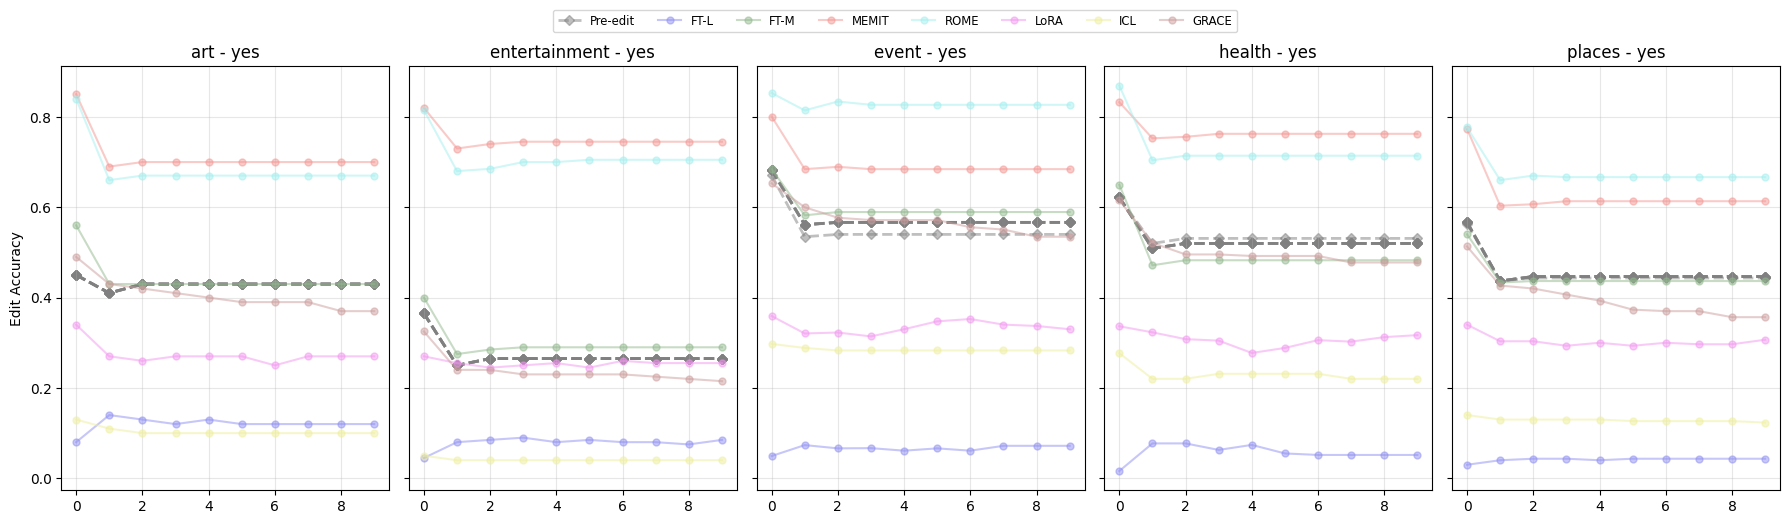

In [42]:
from collections import defaultdict

def plot_multi_turn_all(folder_path):
    edit_methods = set()
    domains = set()
    topics = set()
    types = set()
    data = defaultdict(lambda: defaultdict(lambda: defaultdict(list)))

    for filename in os.listdir(folder_path):
        if filename.endswith('.json'):
            parts = filename.split('_')
            domain, topic, edit_method, type_ = parts[0], parts[1], parts[2], parts[3].replace('.json', '')
            edit_methods.add(edit_method)
            domains.add(domain)
            topics.add(topic)
            types.add(type_)

            file_path = os.path.join(folder_path, filename)
            with open(file_path, 'r') as file:
                metrics = json.load(file)
            
            multi_turn_ls_pre = [e['pre']['edit_acc_multi_turn'] for e in metrics]
            multi_turn_ls_post = [e['post']['edit_acc_multi_turn'] for e in metrics]
            
            data[domain][edit_method][type_].append({
                'pre': np.mean(multi_turn_ls_pre, axis=0)[1:],
                'post': np.mean(multi_turn_ls_post, axis=0)[1:]
            })

    types = ['yes']
    fig, axes = plt.subplots(len(types), len(domains), figsize=(18, 1*len(domains)), sharex=True, sharey=True)
    # fig.suptitle('Multi-turn Edit Accuracy for Different Methods', fontsize=16)

    # Create a single legend for all subplots
    lines = []
    labels = []
    
    for i, type_ in enumerate(types):
    # for i, type_ in ['yes']:
        for j, domain in enumerate(domains):
            # print(type_, domain)
            # ax = axes[i, j]
            ax = axes[j]
            ax.grid(True, zorder=-1, alpha=0.3)
            ax.set_title(f'{domain} - {type_}')
            if i == 1:
                ax.set_xlabel('Turn')
            if j == 0:
                ax.set_ylabel('Edit Accuracy')

            for edit_method in edit_method_order_ls:
                if data[domain][edit_method][type_]:
                    avg_pre = np.mean([d['pre'] for d in data[domain][edit_method][type_]], axis=0)  # get the average of multiple topics in the same domain and type
                    avg_post = np.mean([d['post'] for d in data[domain][edit_method][type_]], axis=0)
                    
                    color = colors[edit_method_order_ls.index(edit_method)]
                    pre_line, = ax.plot(avg_pre, marker='D', linestyle='--', alpha=0.5, color='grey', markersize=5, linewidth=2, zorder=-1)
                    # pre_line, = ax.plot(avg_pre, marker='o', linestyle='--', alpha=0.5, markersize=5, color=color)
                    post_line, = ax.plot(avg_post, marker='o', alpha=0.5, markersize=5, color=color)
                    
                    if edit_method not in labels:
                        lines.append(post_line)
                        labels.append(edit_method)

    # Add pre-edit line to legend
    labels.insert(0, 'Pre-edit')
    lines.insert(0, pre_line)

    fig.legend(lines, labels, loc='upper center', bbox_to_anchor=(0.5, 1.05), ncol=8, fontsize='small')

    plt.tight_layout()
    plt.show()
    # return data

plot_multi_turn_all('../results/mistral_7b_instruct_v0.3_multi_turn')

In [ ]:
data['places']['ROME']['yes'], data['art']['ROME']['yes']

In [ ]:
plot_multi_turn_all('../results/llama_2_7b_chat_hf_multi_turn')

In [ ]:
plot_multi_turn_all('../results/meta_llama_3_8b_instruct_multi_turn')

In [ ]:
plot_multi_turn_all('../results/llama_2_7b_chat_hf_multi_turn')

In [ ]:
with open('../tmp/tmp2_places_country_ROME_meta_llama_3.1_8b_instruct_results.json', 'r') as file:
    metrics = json.load(file)
metrics[0]

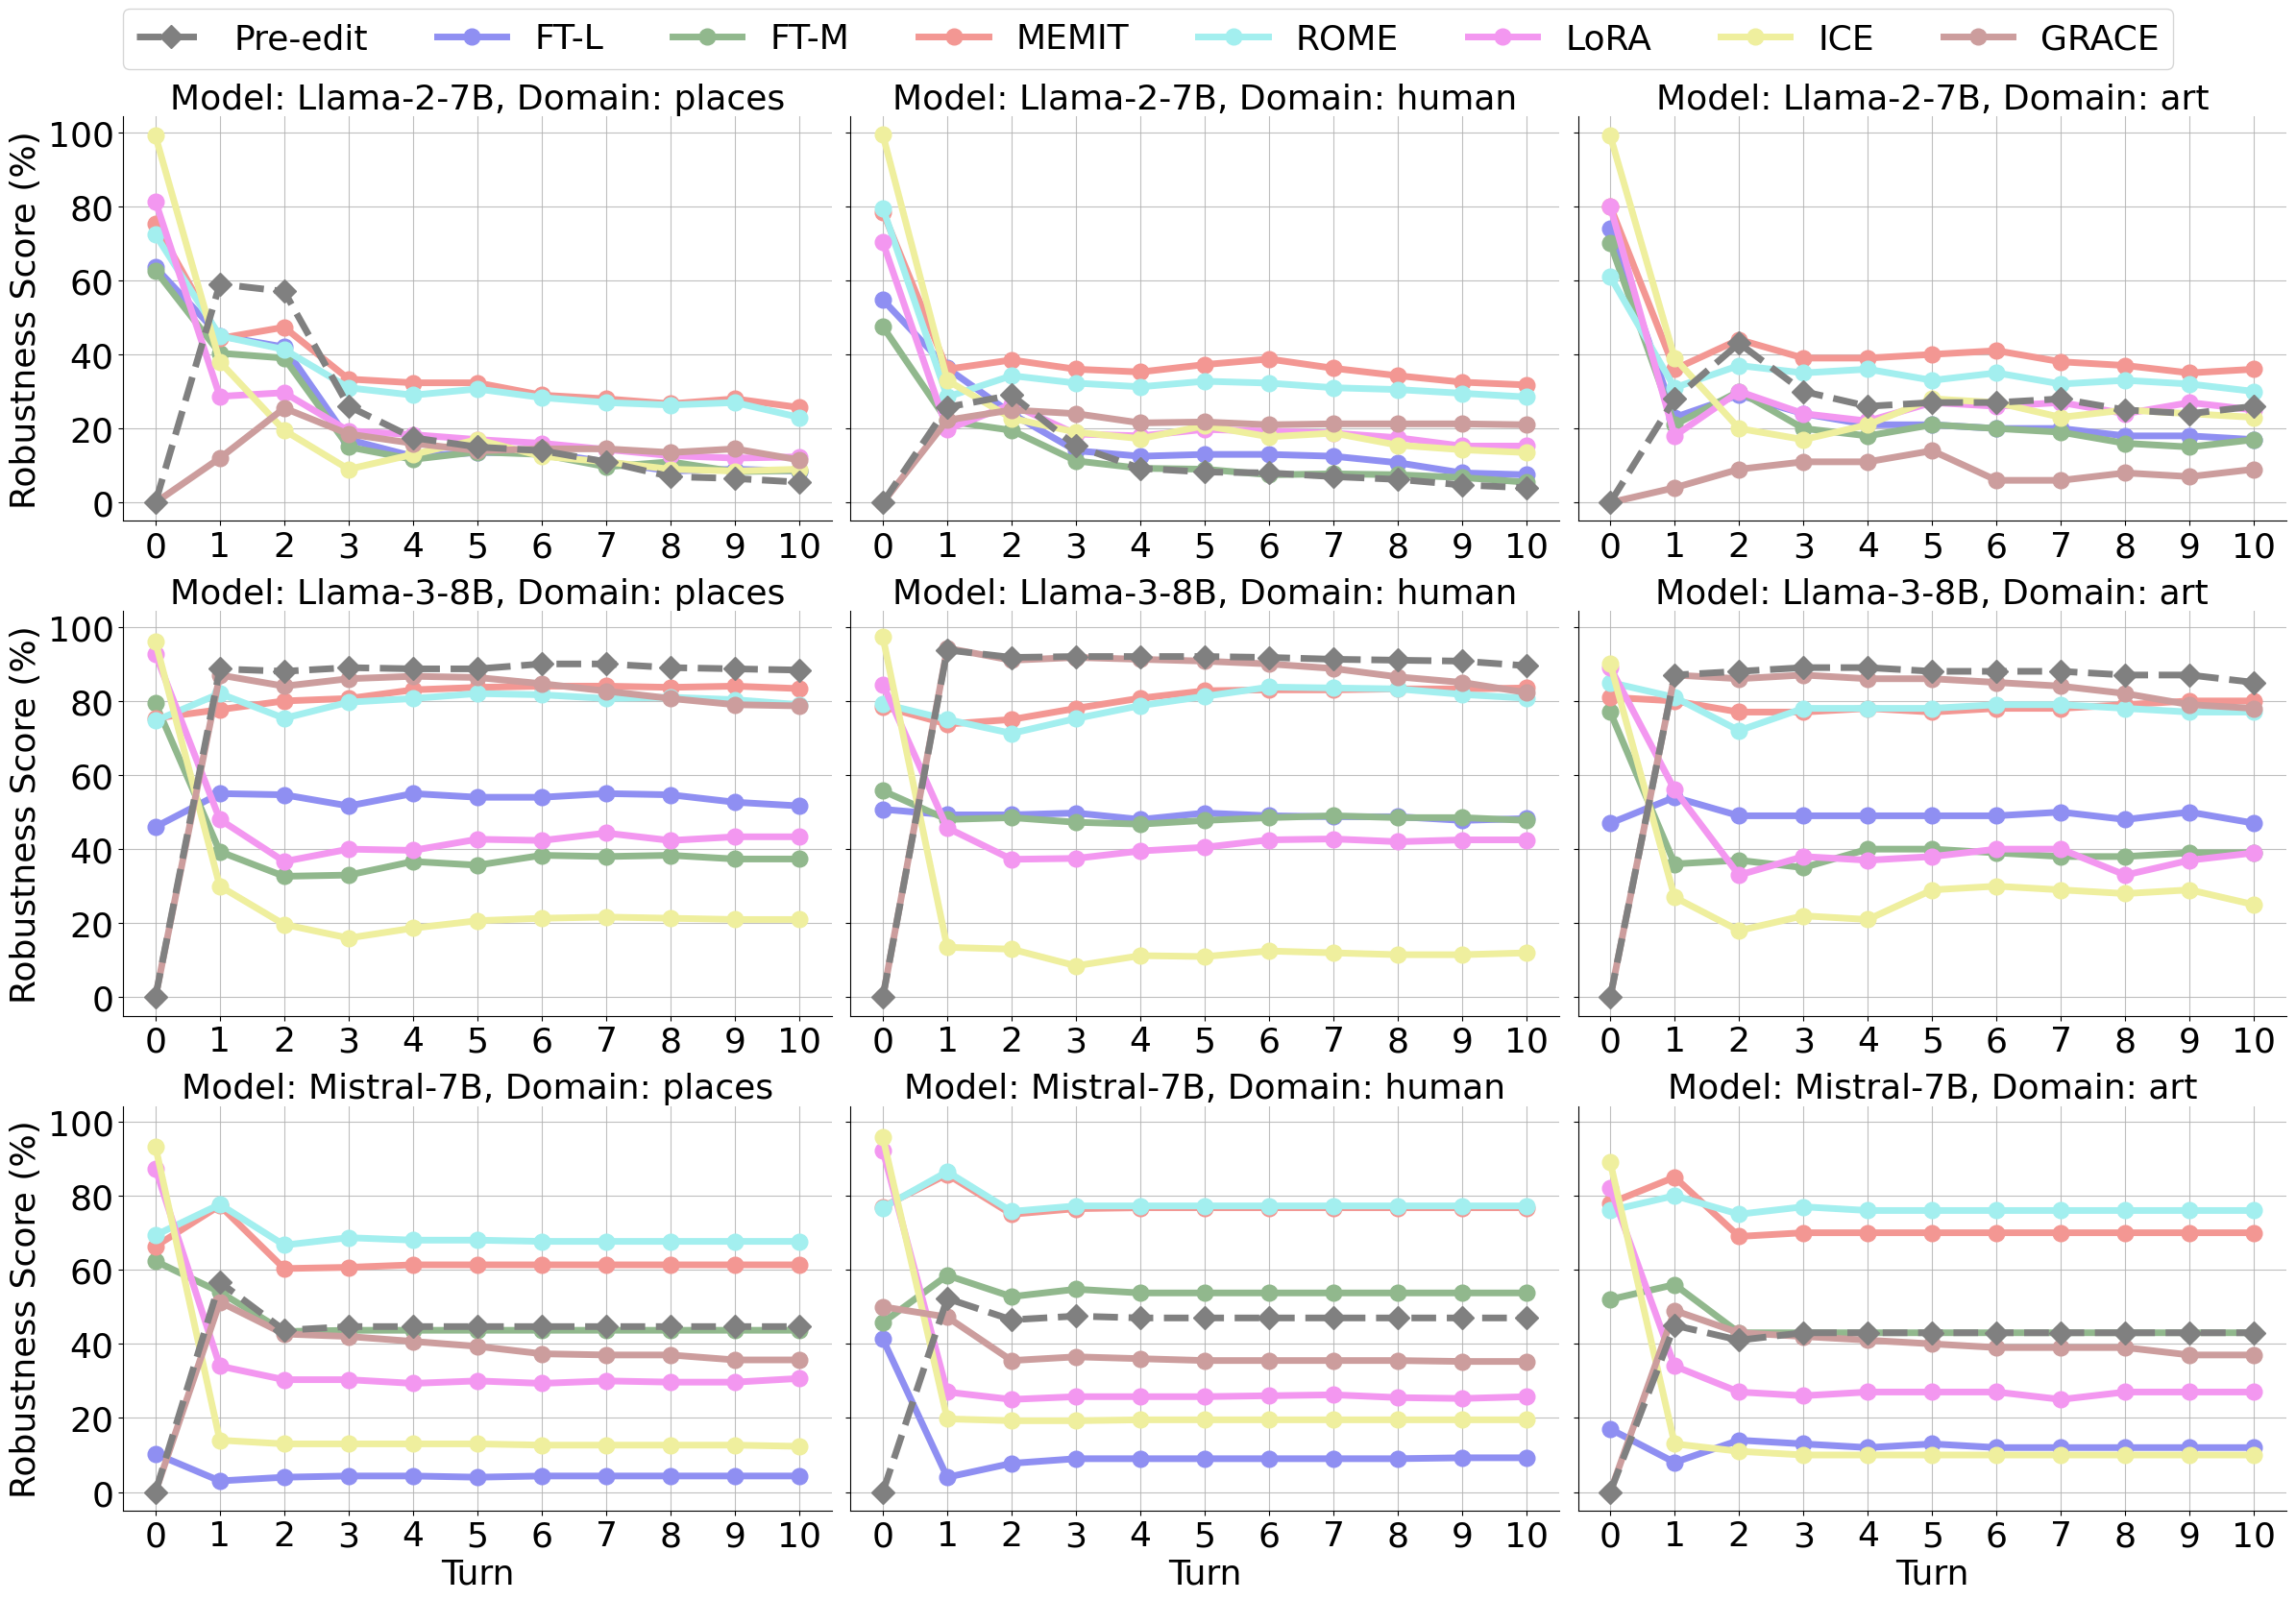

In [29]:
from collections import defaultdict

def plot_multi_turn_all_models(folder_paths, model_name_ls, domains_to_plot):
    edit_methods = set()
    domains = set()
    topics = set()
    types = set()
    data = defaultdict(lambda: defaultdict(lambda: defaultdict(lambda: defaultdict(list))))

    for folder_path in folder_paths:
        for filename in os.listdir(folder_path):
            if filename.endswith('.json'):
                parts = filename.split('_')
                domain, topic, edit_method, type_ = parts[0], parts[1], parts[2], parts[3].replace('.json', '')
                edit_methods.add(edit_method)
                domains.add(domain)
                topics.add(topic)
                types.add(type_)

                file_path = os.path.join(folder_path, filename)
                with open(file_path, 'r') as file:
                    metrics = json.load(file)
                
                multi_turn_ls_pre = [e['pre']['edit_acc_multi_turn'] for e in metrics]
                multi_turn_ls_post = [e['post']['edit_acc_multi_turn'] for e in metrics]
                
                data[os.path.basename(folder_path)][domain][edit_method][type_].append({
                    'pre': np.mean(multi_turn_ls_pre, axis=0)[:], # 1
                    'post': np.mean(multi_turn_ls_post, axis=0)[:] # 1
                })

    # types = ['sure']
    type_ = 'yes'
    # domains = ['places', 'art', 'event']  # , 'entertainment', 'business'
    # fig, axes = plt.subplots(len(folder_paths), len(domains_to_plot), figsize=(20, 3*len(folder_paths)), sharex=False, sharey=True)
    fig, axes = plt.subplots(3, 3, figsize=(24, 16), sharex=False, sharey=True)
    
    # Create a single legend for all subplots
    lines = []
    labels = []
    
    for k, folder in enumerate(folder_paths):
        folder_name = os.path.basename(folder)
        for j, domain in enumerate(domains_to_plot):
            ax = axes[k, j] if len(folder_paths) > 1 else axes[j]
            ax.grid(True, zorder=-1, alpha=0.8)
            ax.set_title(f'Model: {model_name_ls[k]}, Domain: {domain}', fontsize=26)
            ax.set_yticks([0, 20, 40, 60, 80, 100])
            ax.set_yticklabels(['0', '20', '40', '60', '80', '100'], fontsize=26)
            ax.set_xticks(range(0, 11))
            ax.set_xticklabels(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10'], fontsize=26)
            ax.tick_params(axis='y', labelsize=26)
            ax.set_axisbelow(True)
            ax.spines['right'].set_visible(False)
            ax.spines['top'].set_visible(False)

            if k == len(folder_paths) - 1:
                ax.set_xlabel('Turn', fontsize=26)
            if j == 0:
                ax.set_ylabel('Robustness Score (%)', fontsize=26)

            for i, edit_method in enumerate(edit_method_order_ls):
                if data[folder_name][domain][edit_method][type_]:
                    
                    avg_post = np.mean([d['post'] for d in data[folder_name][domain][edit_method][type_]], axis=0) * 100
                    # print(f'{folder_name} {domain} {edit_method} \npre: {[d['pre'] for d in data[folder_name][domain][edit_method]['yes']]}\n')
                    

                    post_line, = ax.plot(avg_post, marker='o',color=colors[i], linewidth=5, markersize=12) # , alpha=0.5
                    
                    if edit_method not in labels:
                        lines.append(post_line)
                        labels.append(edit_method)
            avg_pre = np.mean([d['pre'] for d in data[folder_name][domain]['ICL'][type_]], axis=0) * 100
            pre_line, = ax.plot(avg_pre, marker='D', linestyle='--', color='grey', linewidth=5, markersize=12, zorder=2)

    # Add pre-edit line to legend
    labels.insert(0, 'Pre-edit')
    lines.insert(0, pre_line)

    labels = ['ICE' if label == 'ICL' else label for label in labels]
    fig.legend(lines, labels, loc='upper center', bbox_to_anchor=(0.5, 1.05), ncol=8, fontsize=26)
    plt.tight_layout()
    plt.savefig(f'../results/figs/plot_robustness_{"_".join(domains_to_plot)}.pdf', bbox_inches='tight', dpi=300)
    plt.show()


plot_multi_turn_all_models([
    '../results/llama_2_7b_chat_hf_multi_turn',
    '../results/meta_llama_3_8b_instruct_multi_turn',
    '../results/mistral_7b_instruct_v0.3_multi_turn',
], 
model_name_ls,
['places', 'human', 'art'])

In [ ]:
plot_multi_turn_all_models([
    '../results/llama_2_7b_chat_hf_multi_turn',
    '../results/meta_llama_3_8b_instruct_multi_turn',
    '../results/mistral_7b_instruct_v0.3_multi_turn',
], 
model_name_ls,
['places', 'art', 'event'])

In [23]:
data

[{'model': 'meta_llama_3_8b_instruct',
  'domain': 'entertainment',
  'topic': 'music genre',
  'edit_method': 'FT-L',
  'type_': 'yes',
  'pre_edit_multi_turn_acc': array([0.89, 0.87, 0.9 , 0.9 , 0.9 , 0.9 , 0.9 , 0.9 , 0.9 , 0.9 ]),
  'post_edit_multi_turn_acc': array([0.58, 0.56, 0.58, 0.58, 0.6 , 0.6 , 0.62, 0.6 , 0.59, 0.6 ])},
 {'model': 'meta_llama_3_8b_instruct',
  'domain': 'entertainment',
  'topic': 'music genre',
  'edit_method': 'ROME',
  'type_': 'yes',
  'pre_edit_multi_turn_acc': array([0.89, 0.87, 0.9 , 0.9 , 0.9 , 0.9 , 0.9 , 0.9 , 0.9 , 0.9 ]),
  'post_edit_multi_turn_acc': array([0.93, 0.85, 0.89, 0.89, 0.91, 0.92, 0.93, 0.93, 0.92, 0.92])},
 {'model': 'meta_llama_3_8b_instruct',
  'domain': 'entertainment',
  'topic': 'song',
  'edit_method': 'LoRA',
  'type_': 'yes',
  'pre_edit_multi_turn_acc': array([0.95, 0.88, 0.89, 0.91, 0.91, 0.91, 0.89, 0.87, 0.88, 0.88]),
  'post_edit_multi_turn_acc': array([0.31, 0.22, 0.19, 0.25, 0.23, 0.29, 0.27, 0.33, 0.28, 0.31])},
 {

## Data Statistics

each file in the folder_unfiltered and folder_hallu_all has name format: {domain}_{topic}.csv, get the size of each file with len(df), summarize the size for each file in dataframe with 3 columns: domain_topic, unfiltered_size, hallucination_all_size, and the percentage of the hallucination_all_size/unfiltered_size.


write a 2 level pie chart contian the size infomation, the first level the first level is the domain, the second level is the topic.

In [7]:
from math import round
from util import model_id_format_ls
model_id_format_ls[:3]

['meta_llama_3_8b_instruct', 'mistral_7b_instruct_v0.3', 'llama_2_7b_chat_hf']

In [11]:
file_info = []

for filename in os.listdir(f'../data/questions/unfiltered/{model_id_format_ls[0]}'):
    if filename.endswith('.csv'):
        parts = filename.split('_')
        domain, topic = parts[0], ' '.join(parts[1:]).replace('.csv', '')
        df_triplet = pd.read_csv(os.path.join('../data/triplet', filename))
        df_triplet_raw = pd.read_csv(os.path.join('../data/triplet/raw', filename))
        
        info = {
            'domain': domain,
            'topic': topic,
            'triplet_raw_size': len(df_triplet_raw),
            'triplet_size': len(df_triplet)
        }
        
        for i, model_id in enumerate(model_id_format_ls[:3]):
            folder_unfiltered = f'../data/questions/unfiltered/{model_id}'
            folder_hallu_all = f'../data/questions/hallucination_all/{model_id}'
            folder_hallu_final = f'../data/questions/hallucination_final/{model_id}'
            
            df_unfiltered = pd.read_csv(os.path.join(folder_unfiltered, filename))
            df_hallu_all = pd.read_csv(os.path.join(folder_hallu_all, filename))
            df_hallu_final = pd.read_csv(os.path.join(folder_hallu_final, filename))
            
            model_name = model_name_ls[i]
            info.update({
                f'unfiltered_size_{model_name}': len(df_unfiltered),
                f'hallucination_all_size_{model_name}': len(df_hallu_all),
                f'hallucination_final_size_{model_name}': len(df_hallu_final),
                f'percentage_{model_name}': round(len(df_hallu_all) / len(df_unfiltered) * 100, 2)
            })
        
        file_info.append(info)

pd.DataFrame(file_info).sort_values(by=['domain'], ascending=False)

,domain,topic,triplet_raw_size,triplet_size,unfiltered_size_llama2-7b,hallucination_all_size_llama2-7b,hallucination_final_size_llama2-7b,percentage_llama2-7b,unfiltered_size_llama3-8b,hallucination_all_size_llama3-8b,hallucination_final_size_llama3-8b,percentage_llama3-8b,unfiltered_size_mistral-7b,hallucination_all_size_mistral-7b,hallucination_final_size_mistral-7b,percentage_mistral-7b
21,technology,software,3105,822,633,365,100,57.66,633,391,100,61.77,633,434,100,68.56
6,technology,programming language,1570,423,311,157,100,50.48,311,181,100,58.20,311,202,100,64.95
18,technology,database,515,219,138,83,82,60.14,138,87,85,63.04,138,88,86,63.77
9,places,landmark,7533,3184,1832,1059,100,57.81,1832,1040,100,56.77,1831,1130,100,61.71
23,places,country,32743,2761,1936,867,100,44.78,1936,660,100,34.09,1936,805,100,41.58
3,places,city,44974,18513,6805,3252,100,47.79,6805,3725,100,54.74,6797,4081,100,60.04
20,human,writer,10000,4339,2685,1188,100,44.25,2685,1293,100,48.16,2684,1367,100,50.93
11,human,scientist,4999,1788,1051,524,100,49.86,1052,560,100,53.23,1051,552,100,52.52
24,human,entrepreneur,4999,2592,1546,728,100,47.09,1546,814,100,52.65,1546,772,100,49.94
7,human,athlete,5000,2392,1313,619,100,47.14,1313,711,100,54.15,1313,739,100,56.28


/tmp/ipykernel_3160379/3522051008.py:44: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  domain_colors = plt.cm.get_cmap('tab20')(np.linspace(0, 1, len(df['domain'].unique())))


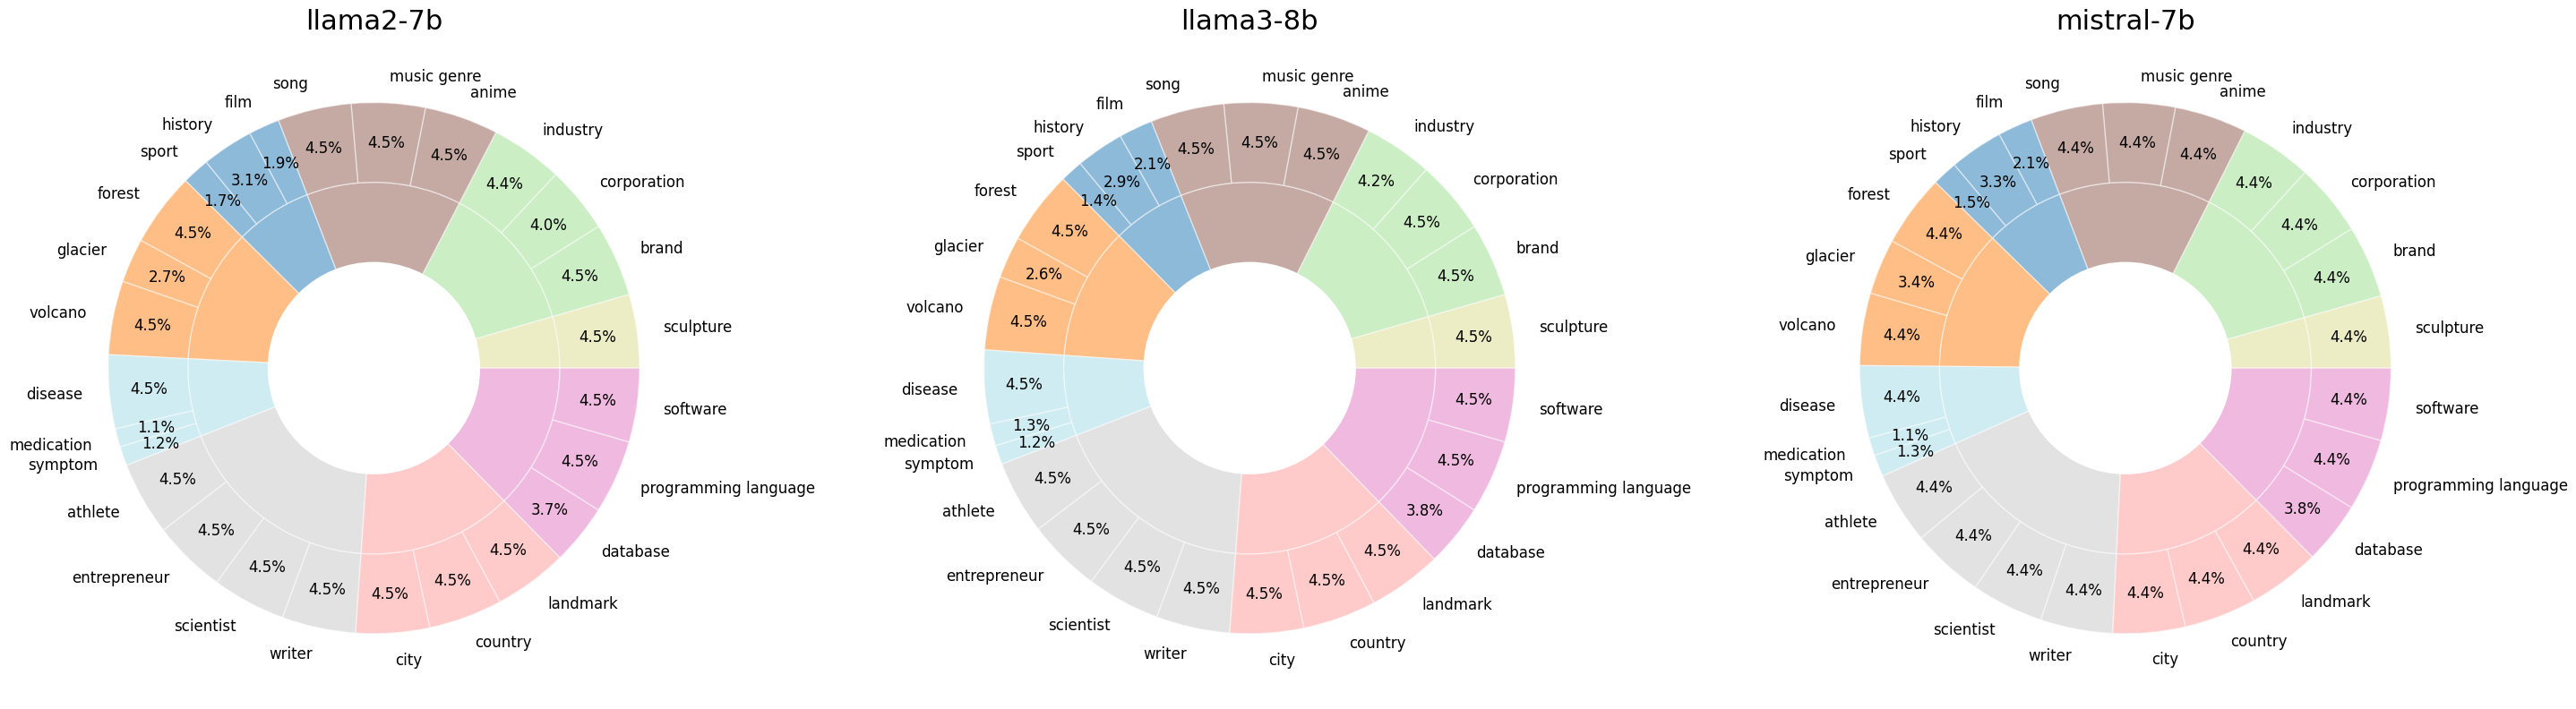

In [55]:
import os
import pandas as pd

file_info = []


for filename in os.listdir(f'../data/questions/unfiltered/{model_id_format_ls[0]}'):
    if filename.endswith('.csv'):
        parts = filename.split('_')
        domain, topic = parts[0], ' '.join(parts[1:]).replace('.csv', '')
        df_triplet = pd.read_csv(os.path.join('../data/triplet', filename))
        df_triplet_raw = pd.read_csv(os.path.join('../data/triplet/raw', filename))
        
        info = {
            'domain': domain,
            'topic': topic,
            'triplet_raw_size': len(df_triplet_raw),
            'triplet_size': len(df_triplet)
        }
        
        for i, model_id in enumerate(model_id_format_ls[:3]):
            folder_unfiltered = f'../data/questions/unfiltered/{model_id}'
            folder_hallu_all = f'../data/questions/hallucination_all/{model_id}'
            folder_hallu_final = f'../data/questions/hallucination_final/{model_id}'
            
            df_unfiltered = pd.read_csv(os.path.join(folder_unfiltered, filename))
            df_hallu_all = pd.read_csv(os.path.join(folder_hallu_all, filename))
            df_hallu_final = pd.read_csv(os.path.join(folder_hallu_final, filename))
            
            model_name = model_name_ls[i]
            info.update({
                f'unfiltered_size_{model_name}': len(df_unfiltered),
                f'hallucination_all_size_{model_name}': len(df_hallu_all),
                f'hallucination_final_size_{model_name}': len(df_hallu_final),
                f'percentage_{model_name}': (len(df_hallu_all) / len(df_unfiltered)) * 100
            })
        
        file_info.append(info)

df = pd.DataFrame(file_info)
fig, axes = plt.subplots(1, 3, figsize=(30, 15))  # Increased figure size

# Create a color map for domains
domain_colors = plt.cm.get_cmap('tab20')(np.linspace(0, 1, len(df['domain'].unique())))
domain_color_map = dict(zip(df['domain'].unique(), domain_colors))

for i, model_name in enumerate(model_name_ls[:3]):
    # Group data by domain and sort topics within each domain
    grouped = df.sort_values(['domain', 'topic'])
    val = grouped[f'hallucination_final_size_{model_name}']
    topics = grouped['topic']
    domains = grouped['domain']
    
    # Group data by domain
    domain_data = grouped.groupby('domain')[f'hallucination_final_size_{model_name}'].sum()
    
    # Create inner circle (domains)
    inner_colors = [domain_color_map[domain] for domain in domain_data.index]
    axes[i].pie(domain_data.values, colors=inner_colors, #labels=domain_data.index, 
                radius=0.7, labeldistance=0.6, #autopct='%1.1f%%', pctdistance=0.6,
                textprops={'fontsize': 14}, wedgeprops=dict(width=0.5, edgecolor='white', alpha=0.5))
    
    # Create outer circle (topics)
    outer_colors = [domain_color_map[domain] for domain in domains]
    axes[i].pie(val, labels=topics, colors=outer_colors, radius=1, labeldistance=1.1, 
                autopct='%1.1f%%', pctdistance=0.85, textprops={'fontsize': 12},
                wedgeprops=dict(width=0.3, edgecolor='white', alpha=0.5))
    
    # Add a circle at the center to create a donut chart
    centre_circle = plt.Circle((0, 0), 0.4, fc='white')
    axes[i].add_artist(centre_circle)
    
    axes[i].set_title(f'{model_name}', fontsize=22)

plt.tight_layout(pad=3.0)  # Increased padding between subplots
plt.show()

use 'hallucination_final_size_{model_name}' to plot two-level nested pie charts for each model. Domain is level 1, topic under domain is level 2.

In [ ]:
df = pd.DataFrame(file_info)
fig, axes = plt.subplots(1, 3, figsize=(24, 12))

# Create a color map for domains
domain_colors = plt.cm.get_cmap('tab20')(np.linspace(0, 1, len(df['domain'].unique())))
domain_color_map = dict(zip(df['domain'].unique(), domain_colors))

for i, model_name in enumerate(model_name_ls[:3]):
    # Group data by domain and sort topics within each domain
    grouped = df.sort_values(['domain', 'topic'])
    val = grouped[f'hallucination_final_size_{model_name}']
    topics = grouped['topic']
    domains = grouped['domain']
    
    # Group data by domain
    domain_data = grouped.groupby('domain')[f'hallucination_final_size_{model_name}'].sum()
    
    # Create inner circle (domains)
    inner_colors = [domain_color_map[domain] for domain in domain_data.index]
    axes[i].pie(domain_data.values, labels=domain_data.index, colors=inner_colors, 
                radius=0.7, labeldistance=0.75, autopct='%1.1f%%', pctdistance=0.6, 
                textprops={'fontsize': 12})
    
    # Create outer circle (topics)
    outer_colors = [domain_color_map[domain] for domain in domains]
    axes[i].pie(val, labels=topics, colors=outer_colors, radius=1, labeldistance=1.1,
                autopct='%1.1f%%', pctdistance=0.85, textprops={'fontsize': 10})
    
    # Add a circle at the center to create a donut chart
    centre_circle = plt.Circle((0, 0), 0.5, fc='white')
    axes[i].add_artist(centre_circle)
    
    axes[i].set_title(f'{model_name}', fontsize=18)

plt.tight_layout()
plt.show()

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(24, 12))

for i, model_name in enumerate(model_name_ls[:3]):
    percentages = df[f'percentage_{model_name}']
    topics = df['topic']
    
    axes[i].pie(percentages, labels=topics, autopct='%1.1f%%', startangle=90, textprops={'fontsize': 8})
    axes[i].set_title(f'Percentage for {model_name}', fontsize=14)

plt.tight_layout()
plt.show()

In [ ]:
folder_final = f'../data/questions/hallucination_final/meta_llama_3_8b_instruct'


# Get file sizes and organize by domain and topic
sizes = {}
for filename in os.listdir(folder_final):
    if filename.endswith('.csv'):
        domain, topic = filename.split('_', 1)
        topic = topic[:-4]  # Remove .csv extension
        size = os.path.getsize(os.path.join(folder_final, filename))
        if domain not in sizes:
            sizes[domain] = {}
        sizes[domain][topic] = size

# Prepare data for the pie chart
domain_sizes = [sum(topics.values()) for topics in sizes.values()]
domain_labels = list(sizes.keys())

topic_sizes = []
topic_labels = []
domain_colors = sns.color_palette("husl", len(sizes))

for i, (domain, topics) in enumerate(sizes.items()):
    topic_sizes.extend(list(topics.values()))
    topic_labels.extend([f"{domain}: {topic}" for topic in topics.keys()])

# Create the pie chart
fig, ax = plt.subplots(figsize=(12, 8))

# Inner circle for domains
inner_colors = sns.color_palette("pastel", len(domain_sizes))
wedges = ax.pie(domain_sizes, labels=domain_labels, colors=inner_colors, radius=0.7, autopct='%1.1f%%', startangle=90)

# Outer circle for topics
outer_colors = [domain_colors[domain_labels.index(label.split(':')[0])] for label in topic_labels]
ax.pie(topic_sizes, labels=topic_labels, colors=outer_colors, radius=1, autopct='%1.1f%%', startangle=90)

# Add a circle at the center to create a donut chart effect
center_circle = plt.Circle((0, 0), 0.5, fc='white')
fig.gca().add_artist(center_circle)

ax.set_title('File Sizes by Domain and Topic')

plt.tight_layout()
plt.show()
